# House Price Prediction Model Using Decision Tree Regression

Essentially, the aim is to:

- Identify the variables affecting house prices, e.g., the area, the - number of rooms, bathrooms, etc. 
- Create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms; and
- Know the variables that significantly contribute towards predicting house prices.

### Data Preparation and Understanding

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings  
warnings.filterwarnings('ignore')

## Reading and Undrestanding the Data

In [90]:
df = pd.read_csv('housing.csv')

In [91]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [92]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [93]:
df.shape

(545, 13)

In [94]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [96]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [97]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Handling Categorical Variables

In [98]:
cat_col = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[cat_col] = df[cat_col].apply(lambda x : x.map({'yes':1,'no':0}))


In [99]:
df.furnishingstatus = df.furnishingstatus.map(
    {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})


In [100]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [101]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [102]:
df.shape

(545, 13)

## Splitting data into train and test set

In [103]:
import sklearn 
from sklearn.model_selection import train_test_split

In [104]:
df_train,df_test = train_test_split(df , train_size=0.7,test_size=0.3,random_state=100)


In [105]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,3
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,2
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,1
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,1
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,3


In [106]:

df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,2
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,2
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,2
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,2
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,2


In [107]:
df_train.shape

(381, 13)

In [108]:
df_test.shape

(164, 13)

## Scaling the traget features using MinMaxScaler

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()
df_train[['price']] = scaler.fit_transform(df_train[['price']])
df_test[['price']] = scaler.transform(df_test[['price']])

In [111]:
# Creating X_train and y_train
y_train = df_train.pop('price')
X_train = df_train

In [112]:
# Creating X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [113]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,3600,3,1,1,1,0,0,0,0,1,0,3
19,6420,3,2,2,1,0,0,0,1,1,1,2
159,3150,3,2,1,1,1,1,0,1,0,0,1
35,7000,3,2,4,1,0,0,0,1,2,0,1
28,7950,5,2,2,1,0,1,1,0,2,0,3


In [114]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,2880,3,1,2,1,0,0,0,0,0,1,2
54,6000,3,2,2,1,1,0,0,1,1,0,2
171,10269,3,1,1,1,0,0,0,0,1,1,2
244,5320,3,1,2,1,1,1,0,0,0,1,2
268,4950,4,1,2,1,0,0,0,1,0,0,2


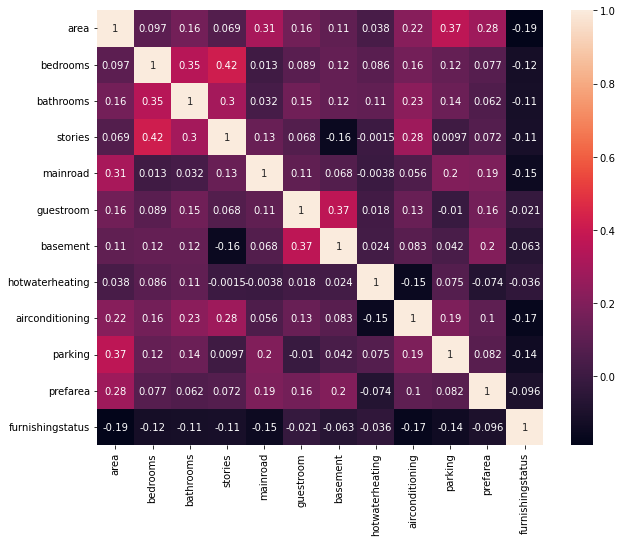

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building Using Random Forest Regression

In [116]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 

In [117]:
rf = RandomForestRegressor()